**Instructions**

- Import the pandas package and sklearn to solve the problems.

- Run all cells before exporting the notebook into a pdf.

- Push  your solution to the github  repository.

1a) Check out the hepatitis dataset from the UCI ML repository and read the description. This dataset contains missing values in categorical and continuous features. The files are also available in the /data folder. 

https://archive.ics.uci.edu/ml/datasets/hepatitis

Read in hepatitis.data into a pandas data frames with column names. (1 point)

Encode the missing categories as 'missing' using the SimpleImputer, and preprocess the categotical features with the OneHot Encoder. (3 points)

Preprocess the target variable ('Class'). (2 points)


In [6]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# read data into df
df = pd.read_csv('data/hepatitis.data',header=None)
cols = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE',\
       'ANOREXIA','LIVER BIG','LIVER FIRM','SPELLN PALPABLE','SPIDERS',\
       'ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN',\
       'PROTIME','HISTOLOGY']
df.columns=cols


cat_ftrs = ['SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE',\
       'ANOREXIA','LIVER BIG','LIVER FIRM','SPELLN PALPABLE','SPIDERS',\
       'ASCITES','VARICES','HISTOLOGY']

# one-hot encoder
ohe = OneHotEncoder(sparse=False)
si = SimpleImputer(missing_values='?',strategy='constant',fill_value='missing')
cat_values = ohe.fit_transform(si.fit_transform(df[cat_ftrs]))
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)

print(df_cat.head())

# label encoding
label = 'Class'
le = LabelEncoder()
y = le.fit_transform(df[label])


   SEX_1  SEX_2  STEROID_1  STEROID_2  STEROID_missing  ANTIVIRALS_1  \
0    0.0    1.0        1.0        0.0              0.0           0.0   
1    1.0    0.0        1.0        0.0              0.0           0.0   
2    1.0    0.0        0.0        1.0              0.0           0.0   
3    1.0    0.0        0.0        0.0              1.0           1.0   
4    1.0    0.0        0.0        1.0              0.0           0.0   

   ANTIVIRALS_2  FATIGUE_1  FATIGUE_2  FATIGUE_missing  ...  SPIDERS_2  \
0           1.0        0.0        1.0              0.0  ...        1.0   
1           1.0        1.0        0.0              0.0  ...        1.0   
2           1.0        1.0        0.0              0.0  ...        1.0   
3           0.0        0.0        1.0              0.0  ...        1.0   
4           1.0        0.0        1.0              0.0  ...        1.0   

   SPIDERS_missing  ASCITES_1  ASCITES_2  ASCITES_missing  VARICES_1  \
0              0.0        0.0        1.0          

1b) 

Replace the missing values ('?') with np.nan in the continuous features. (2 points)

Apply multivariate imputation to the preprocessed dataframe, create five different imputed datasets, and save them as csv files. (4 points)

In [2]:
# replace ? with np.nan in continuous features
cont_ftrs = ['AGE','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN',\
       'PROTIME']
si2 = SimpleImputer(missing_values='?',strategy='constant',fill_value=np.nan)
cont_values = si2.fit_transform(df[cont_ftrs])
df_cont = pd.DataFrame(data=cont_values,columns = cont_ftrs)

# the preprocessed dataframe
df_prep = pd.concat([df_cat,df_cont],axis=1)
df_prep[label] = y
print(df_prep)

df_prep.to_csv('data/hepatitis.csv',index=False)

for i in range(5):
    # the trick is that they need to use a non-deterministic estimator like RandomForestRegressor().
    imputer = IterativeImputer(estimator=RandomForestRegressor(),random_state=i*100)
    X_impute = imputer.fit_transform(df_prep)
    df_imputed = pd.DataFrame(data=X_impute,columns=df_prep.columns)
    df_imputed.to_csv('data/hepatitis_imputed_'+str(i)+'.csv',index=False)
    



     x0_1  x0_2  x1_1  x1_2  x1_missing  x2_1  x2_2  x3_1  x3_2  x3_missing  \
0     0.0   1.0   1.0   0.0         0.0   0.0   1.0   0.0   1.0         0.0   
1     1.0   0.0   1.0   0.0         0.0   0.0   1.0   1.0   0.0         0.0   
2     1.0   0.0   0.0   1.0         0.0   0.0   1.0   1.0   0.0         0.0   
3     1.0   0.0   0.0   0.0         1.0   1.0   0.0   0.0   1.0         0.0   
4     1.0   0.0   0.0   1.0         0.0   0.0   1.0   0.0   1.0         0.0   
5     1.0   0.0   0.0   1.0         0.0   0.0   1.0   0.0   1.0         0.0   
6     1.0   0.0   1.0   0.0         0.0   0.0   1.0   1.0   0.0         0.0   
7     1.0   0.0   0.0   1.0         0.0   0.0   1.0   0.0   1.0         0.0   
8     1.0   0.0   0.0   1.0         0.0   0.0   1.0   1.0   0.0         0.0   
9     1.0   0.0   0.0   1.0         0.0   0.0   1.0   0.0   1.0         0.0   
10    1.0   0.0   1.0   0.0         0.0   1.0   0.0   0.0   1.0         0.0   
11    1.0   0.0   0.0   1.0         0.0   1.0   0.0 

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

2a) Load the kaggle sale price dataset.

Preprocess the data as we did during the class. (0 points - this is just copy-paste)

Calculate the correlation coefficient between the target variable ('SalePrice') and all the other features. Select the top 30 features that are the most negatively correlated with 'SalePrice' and print the column names. (3 points)


In [1]:
# this cell  is copy-pasted from the lecture
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Let's load the data
df = pd.read_csv('data/train.csv')
# drop the ID
df.drop(columns=['Id'],inplace=True)
print(df.shape)

cat_ftrs = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2',\
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',\
           'Heating','CentralAir','Electrical','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']
ordinal_ftrs = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',\
               'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',\
               'GarageQual','GarageCond','PoolQC','Fence']
ordinal_cats = [['Reg','IR1','IR2','IR3'],['AllPub','NoSewr','NoSeWa','ELO'],['Gtl','Mod','Sev'],\
               ['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Po','Fa','TA','Gd','Ex'],['NA','No','Mn','Av','Gd'],['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],\
               ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],\
               ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Unf','RFn','Fin'],['NA','Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],
               ['NA','Fa','TA','Gd','Ex'],['NA','MnWw','GdWo','MnPrv','GdPrv']]
cont_ftrs = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
             'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',\
             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',\
             'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',\
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']


# one-hot encoder
ohe = OneHotEncoder(sparse=False)
si = SimpleImputer(strategy='constant',fill_value='missing')
cat_values = ohe.fit_transform(si.fit_transform(df[cat_ftrs]))
cat_ftr_names = ohe.get_feature_names()
print(cat_ftr_names)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)

# ordinal encoder
oe = OrdinalEncoder(categories = ordinal_cats)
si2 = SimpleImputer(strategy='constant',fill_value='NA')
oe_values = oe.fit_transform(si2.fit_transform(df[ordinal_ftrs]))
df_ordinal = pd.DataFrame(data=oe_values,columns = ordinal_ftrs)

# standard scaler
ss = StandardScaler()
cont_values = ss.fit_transform(df[cont_ftrs])
df_cont = pd.DataFrame(data=cont_values,columns = cont_ftrs)

df_preprocessed = pd.concat([df_cat,df_ordinal,df_cont],axis=1)
df_preprocessed['SalePrice'] = df['SalePrice']
print(df_preprocessed.shape)


(1460, 80)
['x0_C (all)' 'x0_FV' 'x0_RH' 'x0_RL' 'x0_RM' 'x1_Grvl' 'x1_Pave'
 'x2_Grvl' 'x2_Pave' 'x2_missing' 'x3_Bnk' 'x3_HLS' 'x3_Low' 'x3_Lvl'
 'x4_Corner' 'x4_CulDSac' 'x4_FR2' 'x4_FR3' 'x4_Inside' 'x5_Blmngtn'
 'x5_Blueste' 'x5_BrDale' 'x5_BrkSide' 'x5_ClearCr' 'x5_CollgCr'
 'x5_Crawfor' 'x5_Edwards' 'x5_Gilbert' 'x5_IDOTRR' 'x5_MeadowV'
 'x5_Mitchel' 'x5_NAmes' 'x5_NPkVill' 'x5_NWAmes' 'x5_NoRidge'
 'x5_NridgHt' 'x5_OldTown' 'x5_SWISU' 'x5_Sawyer' 'x5_SawyerW'
 'x5_Somerst' 'x5_StoneBr' 'x5_Timber' 'x5_Veenker' 'x6_Artery' 'x6_Feedr'
 'x6_Norm' 'x6_PosA' 'x6_PosN' 'x6_RRAe' 'x6_RRAn' 'x6_RRNe' 'x6_RRNn'
 'x7_Artery' 'x7_Feedr' 'x7_Norm' 'x7_PosA' 'x7_PosN' 'x7_RRAe' 'x7_RRAn'
 'x7_RRNn' 'x8_1Fam' 'x8_2fmCon' 'x8_Duplex' 'x8_Twnhs' 'x8_TwnhsE'
 'x9_1.5Fin' 'x9_1.5Unf' 'x9_1Story' 'x9_2.5Fin' 'x9_2.5Unf' 'x9_2Story'
 'x9_SFoyer' 'x9_SLvl' 'x10_Flat' 'x10_Gable' 'x10_Gambrel' 'x10_Hip'
 'x10_Mansard' 'x10_Shed' 'x11_ClyTile' 'x11_CompShg' 'x11_Membran'
 'x11_Metal' 'x11_Roll' 'x11_

In [4]:
# this is the solution

corrmat = df_preprocessed.corr()

all_cols = corrmat.sort_values('SalePrice',ascending=True)['SalePrice'].index 
cols = all_cols[:30]

print(cols)


Index(['x14_None', 'x19_Detchd', 'x15_CBlock', 'x0_RM', 'x17_N', 'x22_WD',
       'x19_missing', 'x10_Gable', 'x20_N', 'x15_BrkTil', 'x18_FuseA',
       'x5_OldTown', 'x5_NAmes', 'x5_Edwards', 'x12_MetalSd', 'x5_IDOTRR',
       'x9_1.5Fin', 'x13_MetalSd', 'x13_Wd Sdng', 'x12_Wd Sdng', 'x23_Normal',
       'Fence', 'x5_BrkSide', 'x2_Grvl', 'KitchenAbvGr', 'EnclosedPorch',
       'x5_Sawyer', 'x18_FuseF', 'x15_Slab', 'x23_Abnorml'],
      dtype='object')


2b)

Prepare scatter plots/heatmaps  or boxplots to illustrate the relationship between each feature and the target variable (one figure per feature/target variable combination). (5 points)

Do any of the figures look weird or unusual to you? (0 points, for kudos)

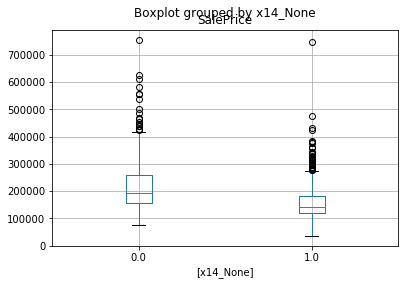

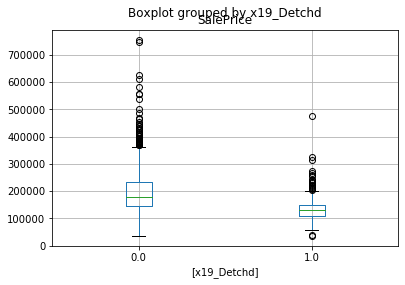

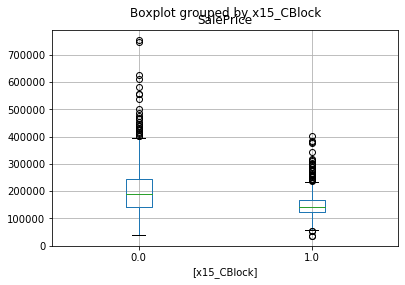

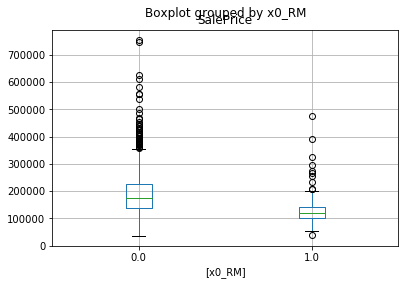

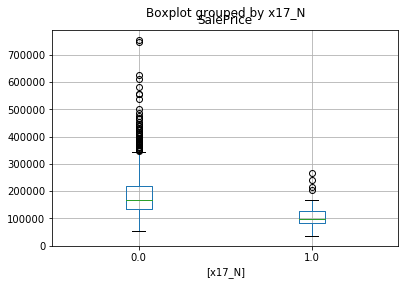

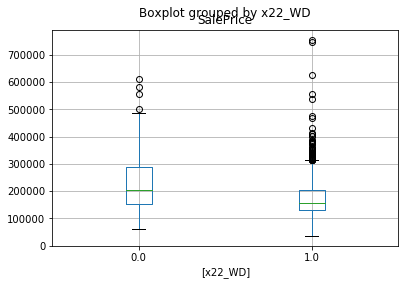

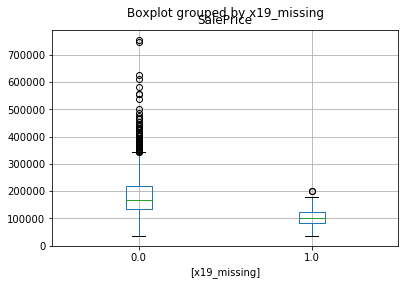

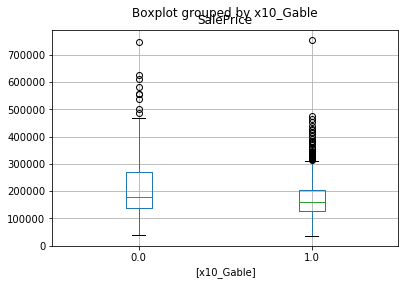

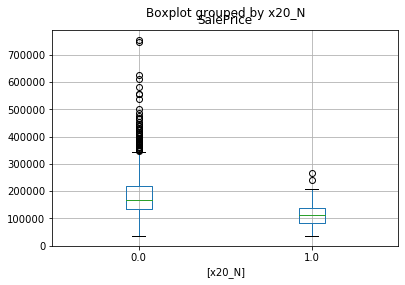

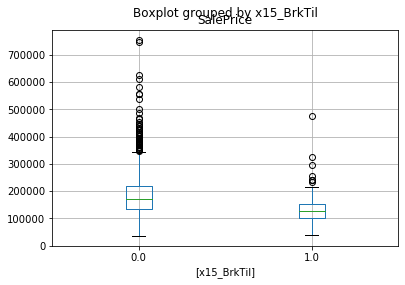

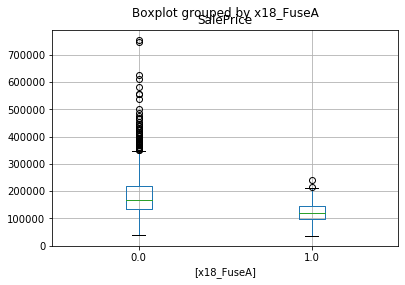

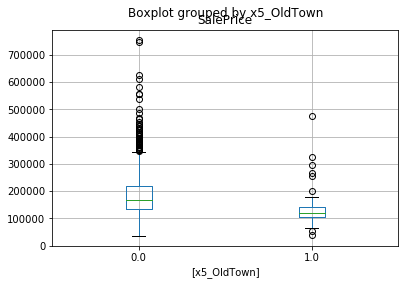

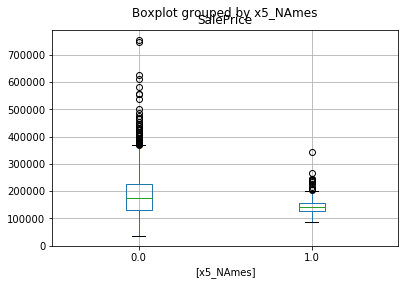

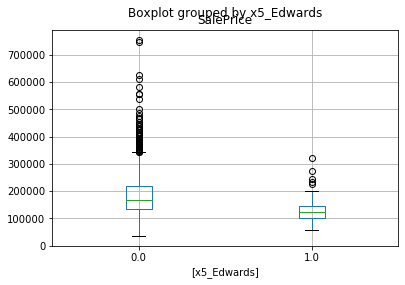

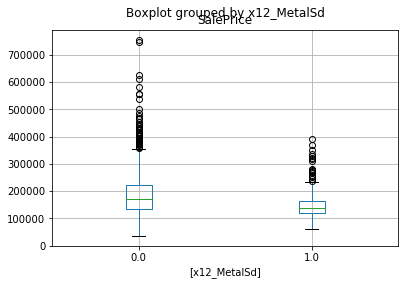

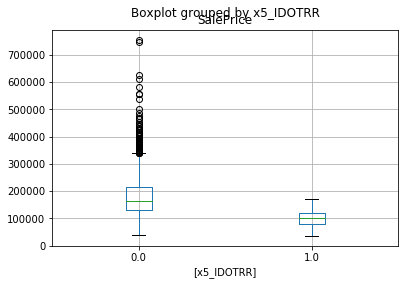

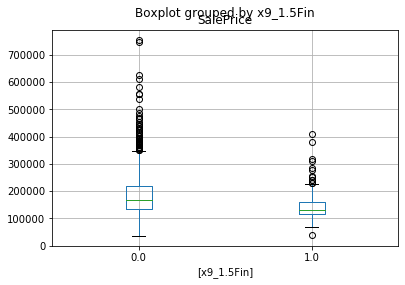

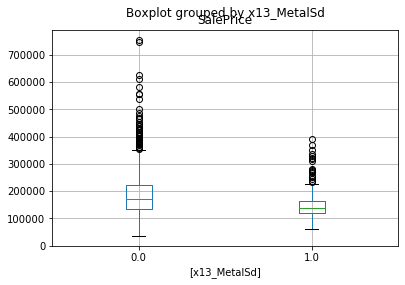

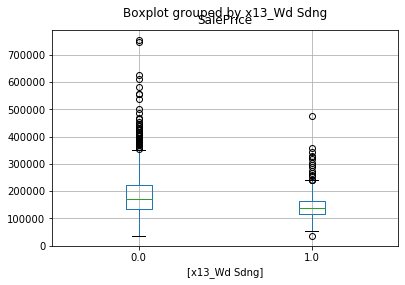

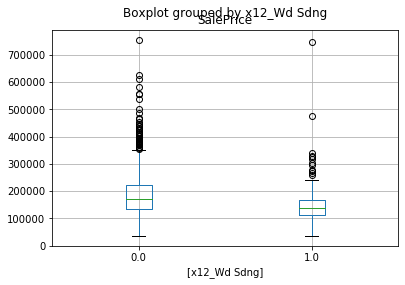

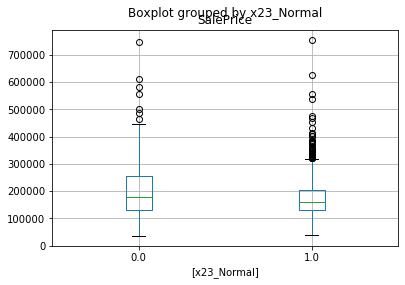

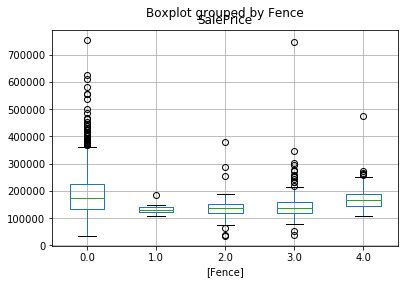

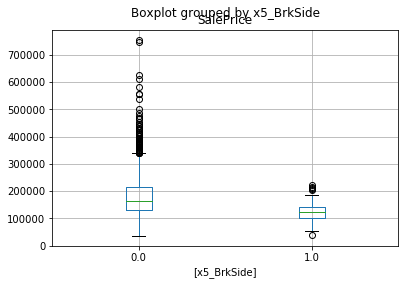

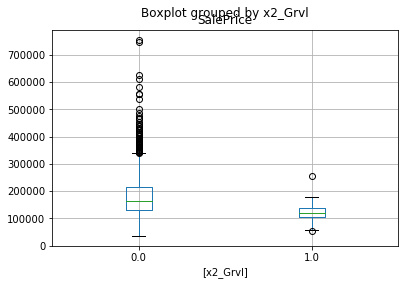

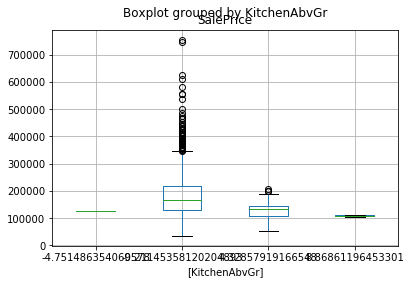

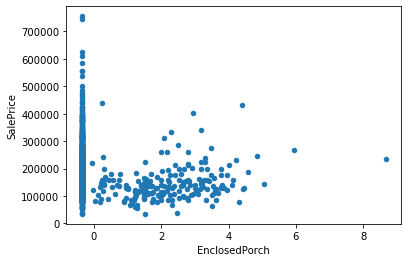

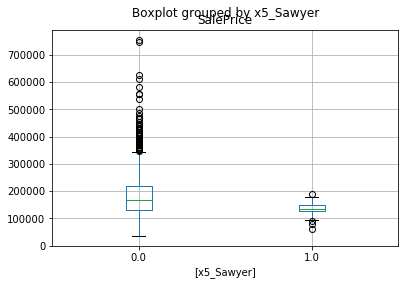

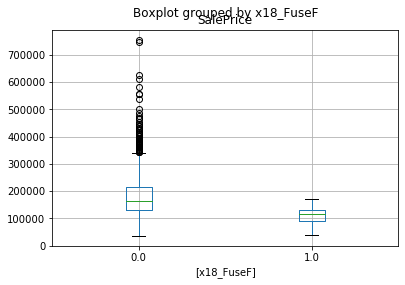

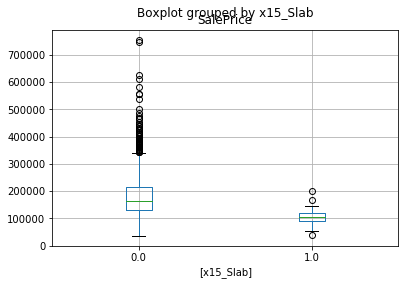

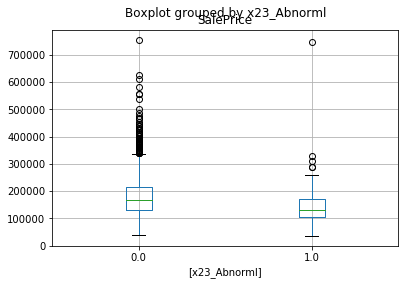

In [6]:
import matplotlib
from matplotlib import pylab as plt

for col in cols:
    if len(np.unique(df_preprocessed[col])) < 10:
        df_preprocessed[['SalePrice',col]].boxplot(by=col)
        plt.show()
    else:
        df_preprocessed.plot.scatter(col,'SalePrice') 
        plt.show()
